## Dealing with Missing

In [1]:
import pandas as pd
from io import StringIO

data = '''A,B,C,D 
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(data)) 
#Stringio help read the data as file since read_csv expects csv data as file

print(df)
print(df.isnull().sum())

print(df.values)

      A     B     C   D 
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN
A     0
B     0
C     1
D     1
dtype: int64
[[ 1.  2.  3.  4.]
 [ 5.  6. nan  8.]
 [10. 11. 12. nan]]


ELiminating missing values

In [2]:
df.dropna(axis = 0) # ELimanatin rows with nan

print(df.dropna(axis = 0))

df.dropna(axis=1) # eliman column

print(df.dropna(axis = 1))

# To drop the colum with all nan  uses how = all instead of the axis =1

# to drop only specific column use subset = 'Column Name'

# To drop only the rows with fewer than no, use thres = 'No'

     A    B    C   D 
0  1.0  2.0  3.0  4.0
      A     B
0   1.0   2.0
1   5.0   6.0
2  10.0  11.0


Inputting   The missing values using imput

In [3]:
from sklearn.impute import SimpleImputer
import numpy as np

miss = SimpleImputer(missing_values= np.nan,strategy= "mean")
miss.fit(df.values)
Impute_Data = miss.transform(df.values)

print(Impute_Data)

# Also we can use ; it replaces the nan with mean

print(df.fillna(df.mean()))

[[ 1.   2.   3.   4. ]
 [ 5.   6.   7.5  8. ]
 [10.  11.  12.   6. ]]
      A     B     C   D 
0   1.0   2.0   3.0  4.0
1   5.0   6.0   7.5  8.0
2  10.0  11.0  12.0  6.0


# HANDLING CATEGORICAL DATA

In [4]:
dyat = pd.DataFrame([['Green','M',10.1,'Class 2'],
                    ['red','L',13.5,'Class 1'],
                    ['blue','XL',15.3,'Class 2']])
dyat.columns = ['Color','Size', 'Price','ClasssLabel']
dyat

,Color,Size,Price,ClasssLabel
0,Green,M,10.1,Class 2
1,red,L,13.5,Class 1
2,blue,XL,15.3,Class 2


In [5]:
size_mapping = {'M':1, 'L': 2, 'XL':3}

dyat['Size'] = dyat['Size'].map(size_mapping)

dyat

,Color,Size,Price,ClasssLabel
0,Green,1,10.1,Class 2
1,red,2,13.5,Class 1
2,blue,3,15.3,Class 2


Class Mapping using sklearn

In [6]:
from sklearn.preprocessing import LabelEncoder

cls_lab = LabelEncoder()

y = cls_lab.fit_transform(dyat['ClasssLabel'])

#TO TRANSFORM BACK
cls_lab.inverse_transform(y)
#print(y)

array(['Class 2', 'Class 1', 'Class 2'], dtype=object)

# Performing one-hot encoding on nominal features

In [ ]:
from sklearn.preprocessing import OneHotEncoder
dyat
# Converting  The color to the integer
X= dyat[['Color','Size','Price']].values
# X[:,0] = cls_lab.fit_transform(X[:,0])

colr_enc =  OneHotEncoder()

re = colr_enc.fit_transform(X[:,0].reshape(-1,1)).toarray()
print(re)
#Please not it  has convert to 100,010,001 based on binary

# If we wanted to select multiple columne we could have used COlumn transformer

# Another simpler way is using get dummies
pd.get_dummies(dyat[['Color','Size','Price']], drop_first= True)

# and If you can note we can remove one feature such as gree; using drop_first =  true which won`ts affect anything` since other colors are well represented









[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


,Size,Price,Color_blue,Color_red
0,1,10.1,False,False
1,2,13.5,False,True
2,3,15.3,True,False


## Partitioning a dataset into separate training and test datasets

In [11]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)

df_wine.columns = ['Class label', 'Alcohol','Malic acid', 'Ash','Alcalinity of ash', 'Magnesium','Total phenols', 'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity', 'Hue','OD280/OD315 of diluted wines','Proline']
print(f'Class_labesl{pd.unique(df_wine['Class label'])}')

print(df_wine)

Class_labesl[1 2 3]
     Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0              1    14.23        1.71  2.43               15.6        127   
1              1    13.20        1.78  2.14               11.2        100   
2              1    13.16        2.36  2.67               18.6        101   
3              1    14.37        1.95  2.50               16.8        113   
4              1    13.24        2.59  2.87               21.0        118   
..           ...      ...         ...   ...                ...        ...   
173            3    13.71        5.65  2.45               20.5         95   
174            3    13.40        3.91  2.48               23.0        102   
175            3    13.27        4.28  2.26               20.0        120   
176            3    13.17        2.59  2.37               20.0        120   
177            3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  P

In [15]:
from sklearn.model_selection import train_test_split

X,Y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size= 0.3,random_state=42, stratify = Y)

## FEATURE SCALING
# It can be done using normalization or standardaziation


EXAMPLE OF NORMALIZER{Keep it in range}; MIN-MAX SCALER
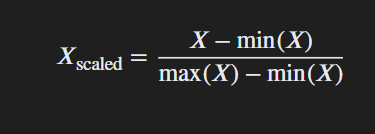


In [19]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train_norm = mms.fit_transform(x_train)

x_test_norm = mms.transform(x_test)

To STANDARDIZE[KEEP IT 0 MEAND AND DEV 1]
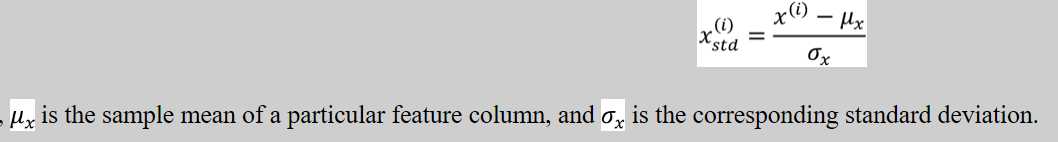

A comparison between the standardizer and normalizer: 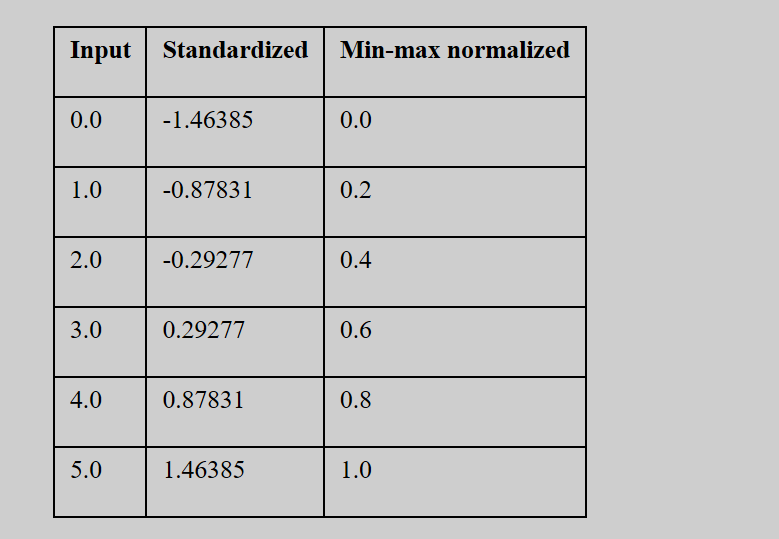

And note the stardized mean we willin x_train, will also be used in the testing data

In [ ]:
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()

x_train_std = ssc.fit_transform(x_train)

x_test_std = ssc.transform(x_test)



[[ 0.25258243  0.06913488  1.14358238 -0.31677183  0.06325176  0.81168907
   1.29604094 -0.51147177  2.08905346  0.28915313  0.33356294  0.8332495
   1.42318887]
 [-0.97250722 -0.79287398  0.62128325 -0.19819158  0.26097996 -0.64537416
  -0.27026285  0.76720766 -0.99829759 -0.86201841  2.16720851 -0.54341332
  -1.28193974]]
[[1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.217e+01 1.450e+00 2.530e+00 1.900e+01 1.040e+02 1.890e+00 1.750e+00
  4.500e-01 1.030e+00 2.950e+00 1.450e+00 2.230e+00 3.550e+02]]
[[0.56052632 0.3201581  0.70430108 0.41237113 0.33695652 0.62758621
  0.85294118 0.34       0.75632911 0.37542662 0.44715447 0.71698113
  0.73322555]
 [0.3        0.14031621 0.62903226 0.43298969 0.36956522 0.3137931
  0.41470588 0.64       0.19303797 0.14249147 0.78861789 0.36226415
  0.06224737]]


## SELECTING MEANINGFULL FEATURES